<a href="https://colab.research.google.com/github/RAJKAMAL002/Stock-Prediction-System/blob/main/stockpricepredictionsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl

In [ ]:
data = quandl.get("NSE/TATAGLOBAL")

In [ ]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


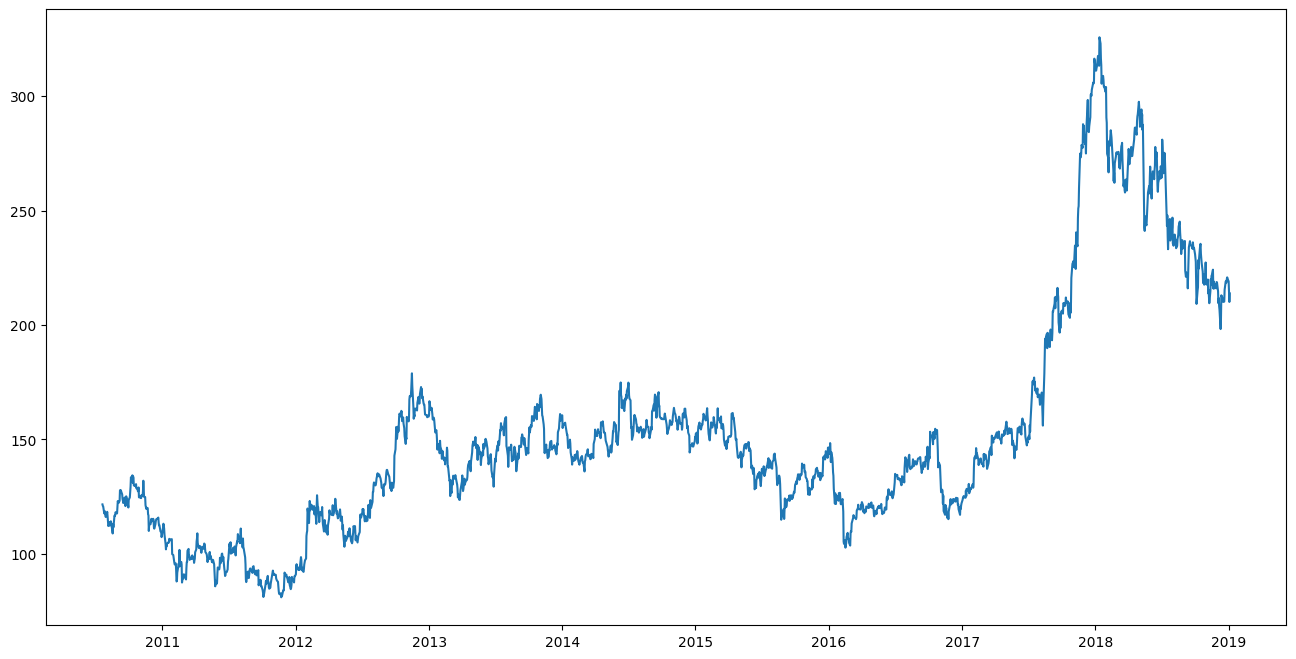

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'], label = 'Closing Price')

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Last']
data = data.dropna()

In [ ]:
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.90
2010-07-22,-0.60,1.25
2010-07-23,1.15,1.60
2010-07-26,2.50,3.90
2010-07-27,-1.05,0.70


In [ ]:
Y = np.where(data['Close'].shift(-1)>data['Close'], 1, -1)

In [ ]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

Implementation of KNN Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# To find the optimal value of K which is a hyperparameter
params = {'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.52


In [ ]:
y = data['Close']

Regression Task

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = 0.25, random_state=44)

#using gridsearch to find the best parameter
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make predictions
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[128.24333333 162.2        138.57       147.26666667 196.51666667
 128.65666667 143.14666667 156.22       126.31666667 168.89
 127.62       135.70333333 152.71666667 212.56666667 133.40333333
 162.55333333 119.66333333 144.59666667 138.51333333 149.42666667
 159.38333333 146.72666667 131.02       140.39333333 143.39666667
 215.34666667 136.56666667 156.20333333 166.03       145.76
 140.92       141.17666667 187.78       137.31666667 157.38333333
 135.13333333 145.59666667 161.96666667 128.32666667 108.62
 138.89666667 138.06333333 128.37333333 154.82       149.97666667
 140.95       203.38333333 128.8        149.38333333 127.01333333
 136.17666667 131.49333333 120.89333333 178.88       140.16666667
 129.34333333 124.69       133.24333333 128.48333333 121.83333333
 139.21       144.10666667 192.25       129.15666667 142.88666667
 129.42       125.11       140.74333333 174.28666667 121.07333333
 141.72666667 212.25666667 174.17333333 148.26       124.88
 157.57666667 123.87666667 160.436

In [ ]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)), 2)))
rms

148.26887715835358

In [ ]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [ ]:
valid.head()

,Actual Close,Predicted Close value
Date,,
2015-03-17,156.70,128.243333
2015-09-07,120.45,162.200000
2013-02-18,141.90,138.570000
2013-07-05,145.15,147.266667
2018-03-15,279.60,196.516667


from matplotlib import pyplot as plt
_df_0['Actual Close'].plot(kind='hist', bins=20, title='Actual Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Close value'].plot(kind='hist', bins=20, title='Predicted Close value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual Close', y='Predicted Close value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual Close'].plot(kind='line', figsize=(8, 4), title='Actual Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted Close value'].plot(kind='line', figsize=(8, 4), title='Predicted Close value')
plt.gca().spines[['top', 'right']].set_visible(False)